In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [30]:
df = pd.read_csv('heart.csv')

In [31]:
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['thal'] = df['thal'].astype('category')
df = pd.get_dummies(df, drop_first=True)

In [32]:
X = df.drop('target', axis=1)
y = df['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7902439024390244
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       102
           1       0.75      0.86      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



In [36]:
# random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [37]:
# support vector machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8780487804878049
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       102
           1       0.85      0.92      0.88       103

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



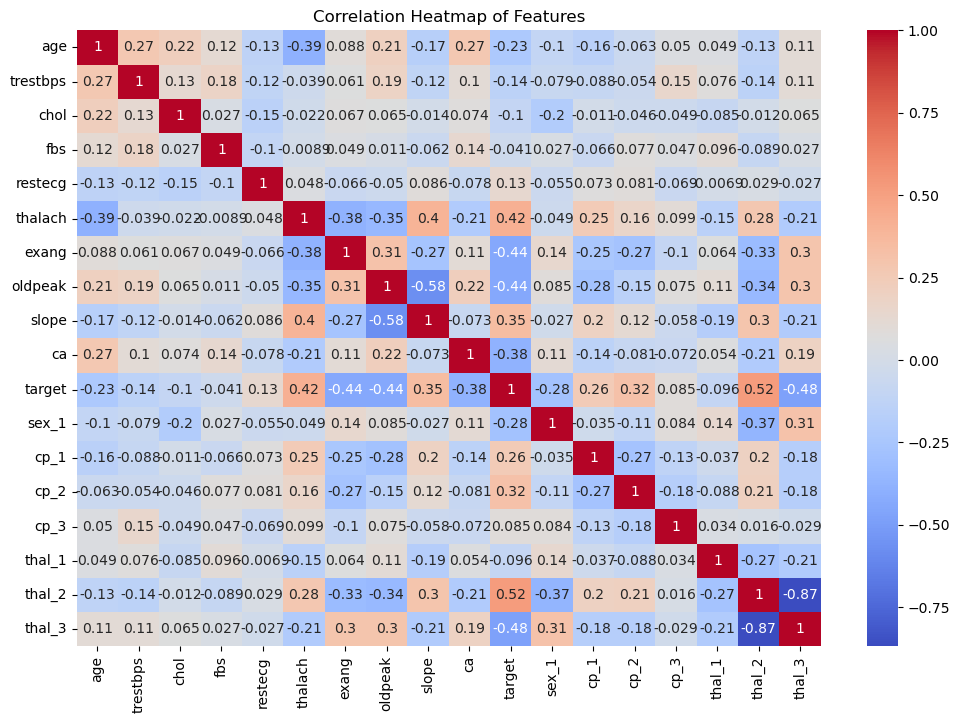

In [38]:
# correlation heatmap
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

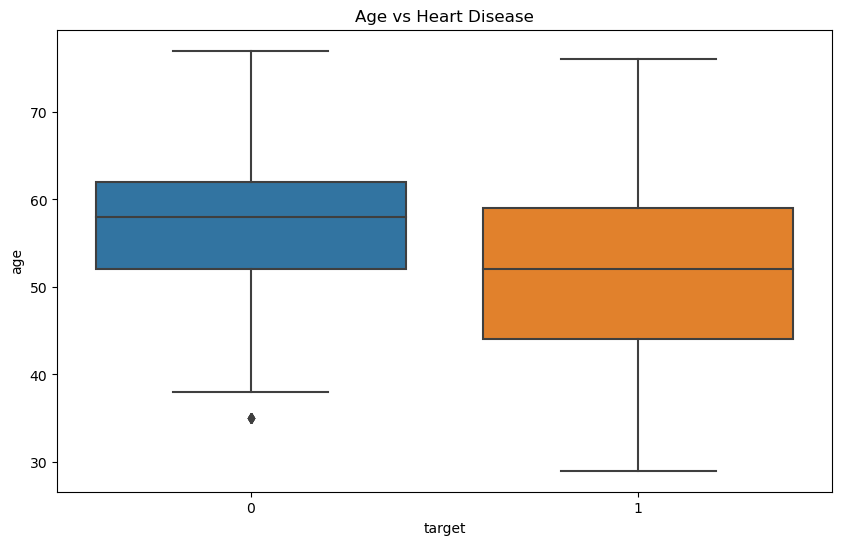

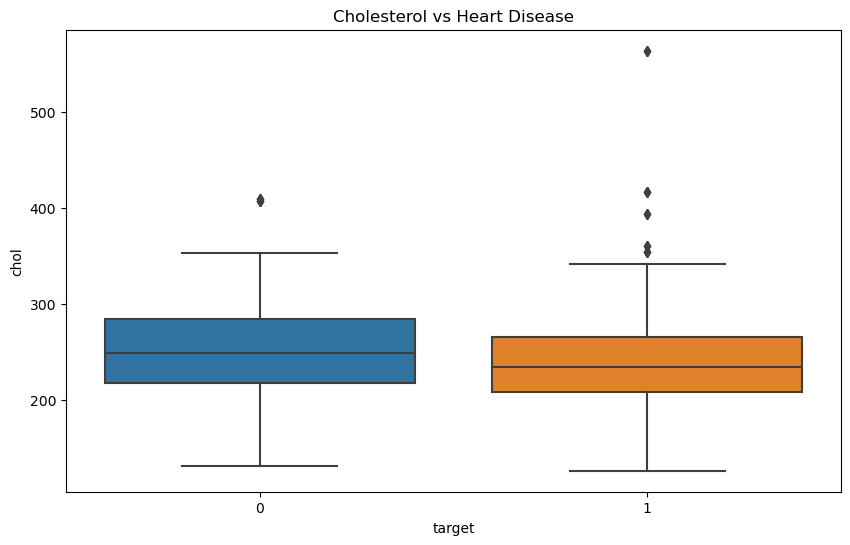

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Heart Disease')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol vs Heart Disease')
plt.show()

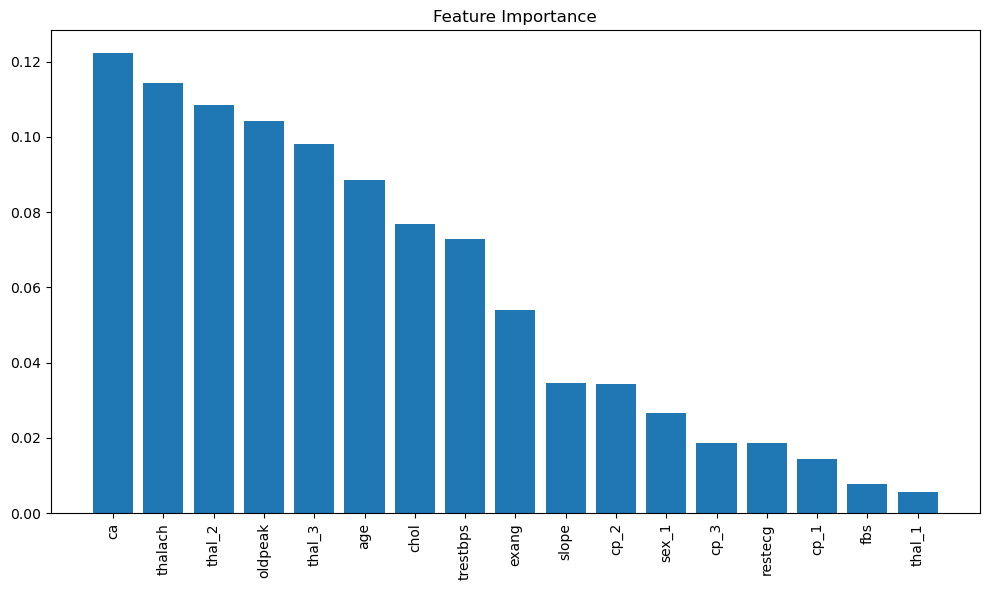

In [40]:
# feature importance/random forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()
